In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import normalized_mutual_info_score
import re

In [21]:
audio_df = pd.read_csv(r"aggregated_data\aggregated_audio\aggregated_audio_features.csv")
mean_main_df = pd.read_csv(r"aggregated_data\aggregated_main\mean_main_features.csv")

In [22]:
audio_df.columns

Index(['avg(num_followers)', 'avg(pid)', 'avg(avg(pid))',
       'avg(avg(num_followers))', 'avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))'],
      dtype='object')

In [23]:
audio_df = audio_df.drop(["avg(num_followers)","avg(pid)"],axis=1)

In [24]:
name_mapping = {col: re.split(r'[()]', col)[2] for col in audio_df.columns}
audio_df = audio_df.rename(name_mapping,axis=1)

In [25]:
audio_df['num_followers'] = audio_df['num_followers'].apply(lambda x: np.int64(x))
audio_df['quartile_group'] = pd.qcut(audio_df['num_followers'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


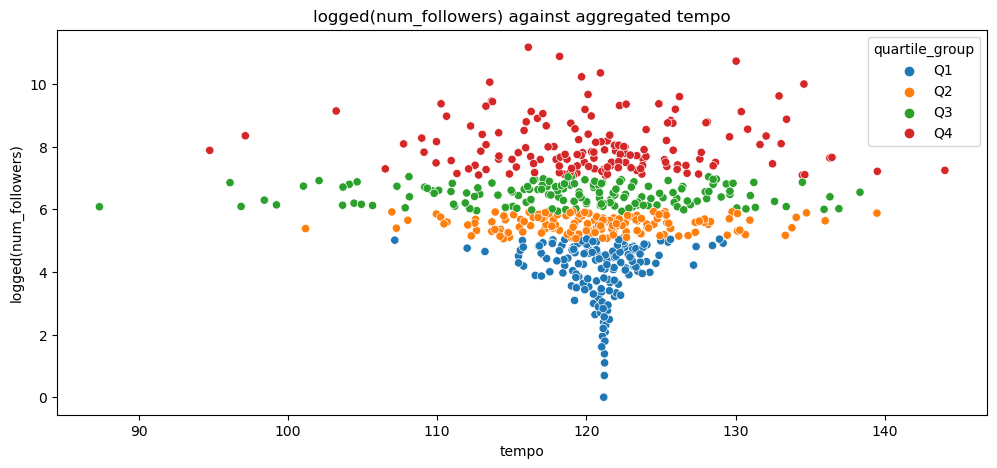

In [27]:
test_audio = audio_df.copy()
test_audio['num_followers'] = np.log(test_audio['num_followers'])
plt.figure(figsize=(12,5))
plt.title("logged(num_followers) against aggregated tempo")
plt.ylabel("logged(num_followers)")
plt.xlabel("tempo")
sns.scatterplot(data=test_audio,x="tempo",y="num_followers",hue="quartile_group")
plt.show()

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


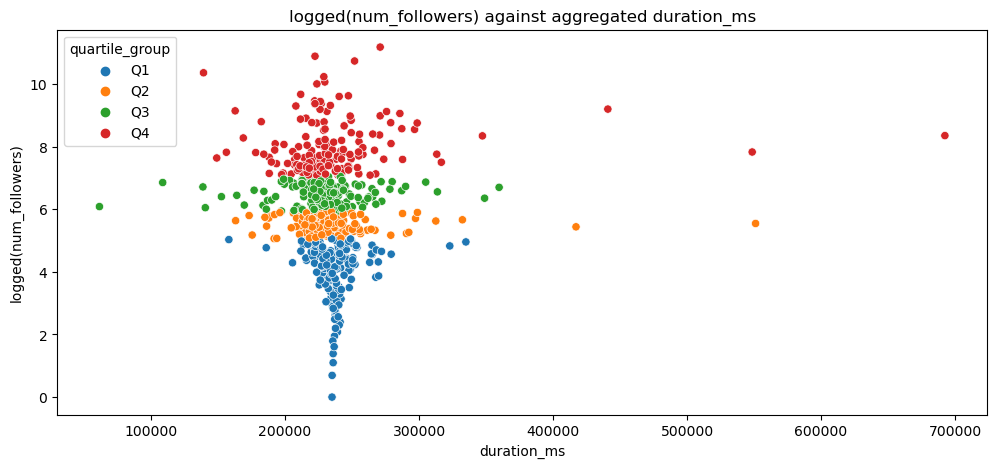

In [28]:
plt.figure(figsize=(12,5))
plt.title("logged(num_followers) against aggregated duration_ms")
plt.ylabel("logged(num_followers)")
plt.xlabel("duration_ms")
sns.scatterplot(data=test_audio,y="num_followers",hue="quartile_group",x="duration_ms")
plt.show()

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


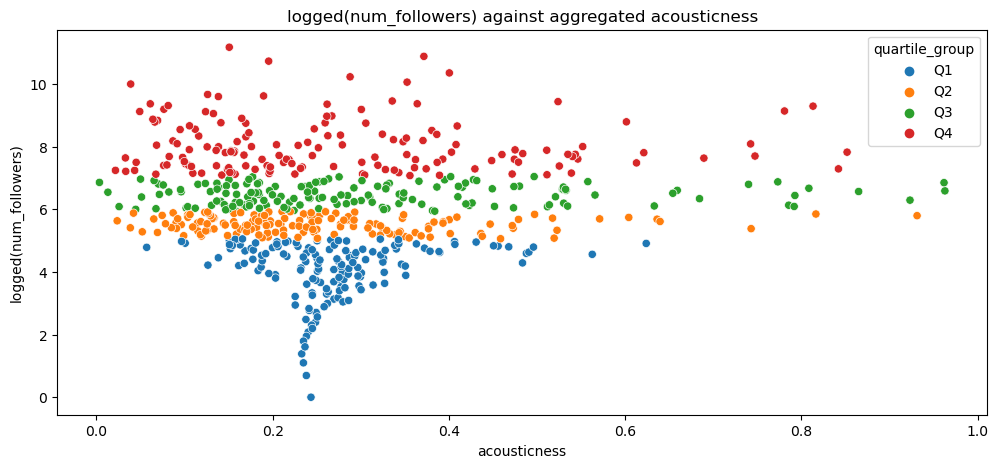

In [29]:
plt.figure(figsize=(12,5))
plt.title("logged(num_followers) against aggregated acousticness")
plt.ylabel("logged(num_followers)")
plt.xlabel("acousticness")
sns.scatterplot(data=test_audio,y="num_followers",hue="quartile_group",x="acousticness")
plt.show()

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


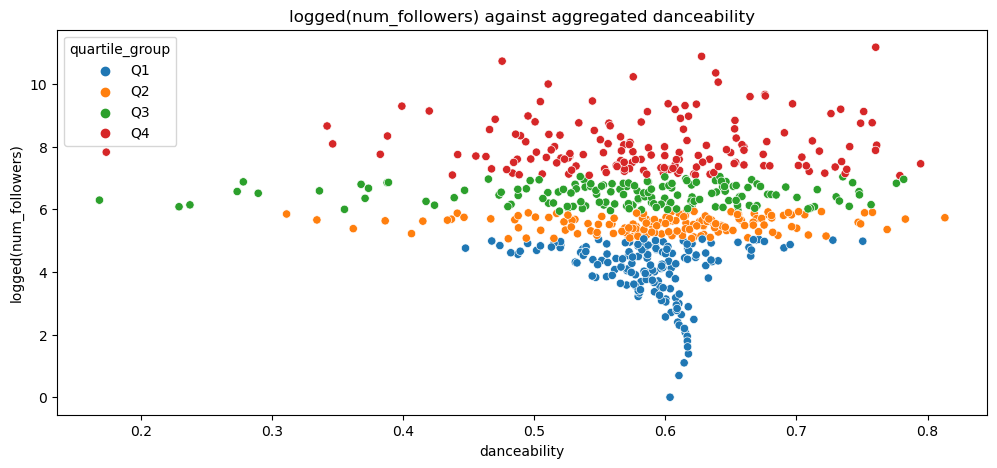

In [30]:
plt.figure(figsize=(12,5))
plt.title("logged(num_followers) against aggregated danceability")
plt.ylabel("logged(num_followers)")
plt.xlabel("danceability")
sns.scatterplot(data=test_audio,y="num_followers",hue="quartile_group",x="danceability")
plt.show()

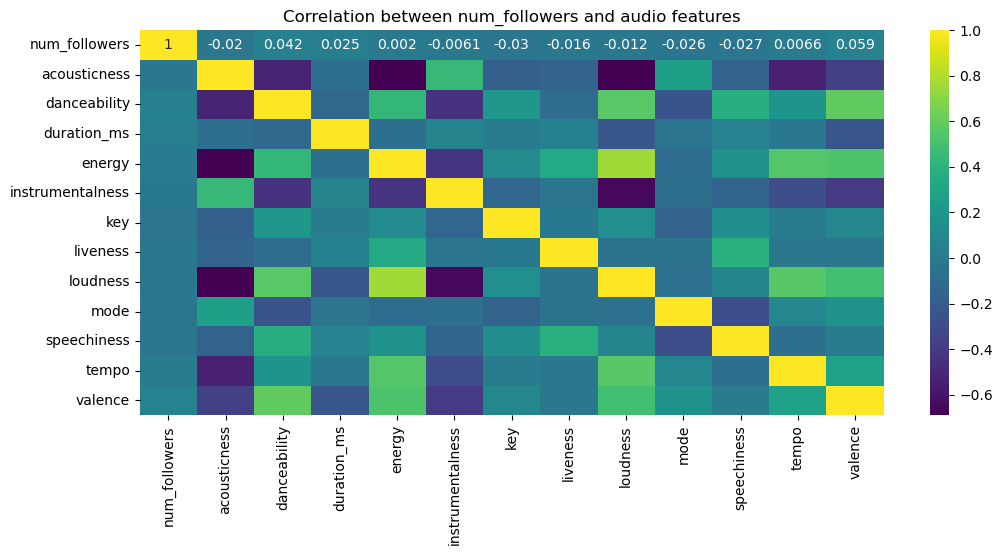

In [33]:
# Get correlation between audio features and num_followers
correlated_columns = audio_df.drop(['quartile_group','pid'],axis=1)
plt.figure(figsize=(12,5))
plt.title("Correlation between num_followers and audio features")
sns.heatmap(correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

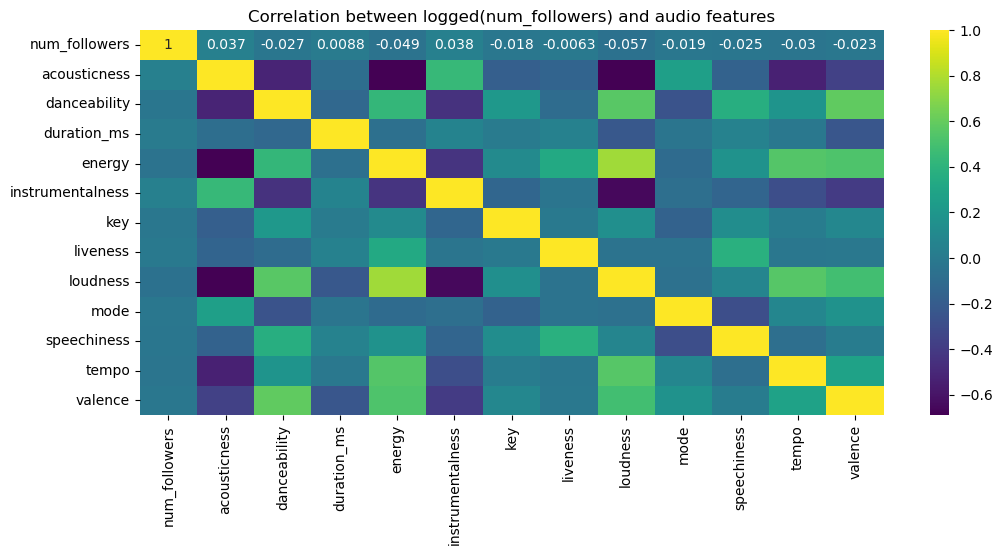

In [34]:
# Get correlation between audio features and logged(num_followers)
correlated_columns = test_audio.drop(['quartile_group','pid'],axis=1)
plt.figure(figsize=(12,5))
plt.title("Correlation between logged(num_followers) and audio features")
sns.heatmap(correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

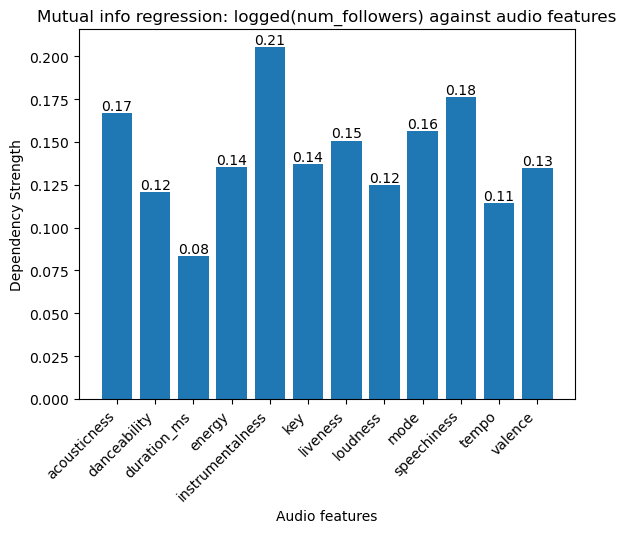

In [49]:
# with logged num_followers
features = ['acousticness',
       'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness',
       'tempo', 'valence']
values = mutual_info_regression(test_audio[features],test_audio['num_followers'])
# reg_df = pd.DataFrame(data=values,columns=features)
# reg_df.head()
plt.bar(features,values,width=0.8)
plt.xticks(rotation=45,ha='right')
plt.title("Mutual info regression: logged(num_followers) against audio features")
plt.ylabel("Dependency Strength")
plt.xlabel("Audio features")
for i, v in enumerate(values):
    plt.text(i, v, str(round(v,2)), ha='center', va='bottom')
plt.show()

In [ ]:
# without logged num_followers
mutual_info_regression(audio_df[['avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))']],audio_df['avg(num_followers)'])

# Main Features analysis

In [50]:
mean_main_df.columns

Index(['num_followers', 'mean_track_length', 'mean_num_artists',
       'mean_num_albums'],
      dtype='object')

In [51]:
mean_main_df['quartile_group'] = pd.qcut(mean_main_df['num_followers'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [53]:
mean_main_df['num_followers'] = np.log(mean_main_df['num_followers'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


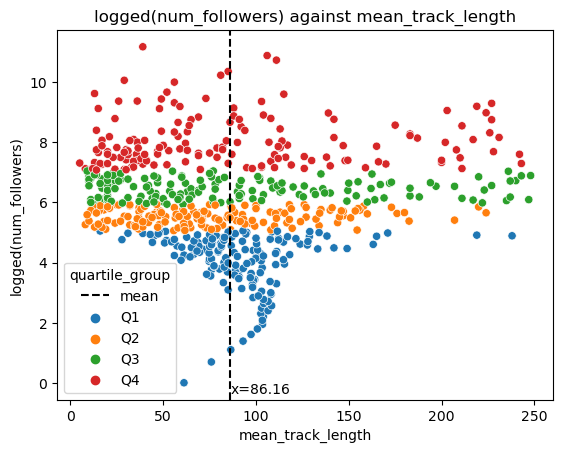

In [59]:
mean_line = mean_main_df['mean_track_length'].mean()
plt.axvline(x=mean_line, color='black', linestyle='--', label='mean')
plt.text(mean_line, 0, f'x={round(mean_line,2)}', va='top', ha='left')
plt.title("logged(num_followers) against mean_track_length")
plt.ylabel("logged(num_followers)")
sns.scatterplot(data=mean_main_df,x="mean_track_length",y="num_followers",hue="quartile_group")
plt.show()

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


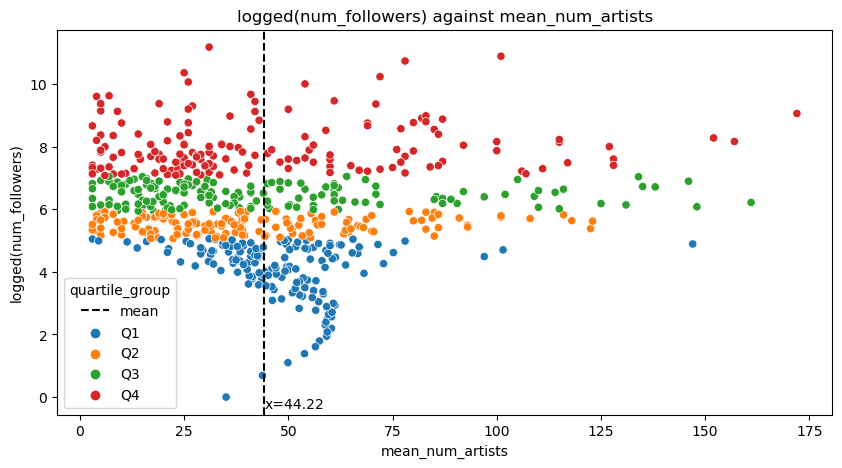

In [64]:
mean_line = mean_main_df['mean_num_artists'].mean()
plt.figure(figsize=(10,5))
plt.axvline(x=mean_line, color='black', linestyle='--', label='mean')
plt.text(mean_line, 0, f'x={round(mean_line,2)}', va='top', ha='left')
plt.title("logged(num_followers) against mean_num_artists")
plt.ylabel("logged(num_followers)")
sns.scatterplot(data=mean_main_df,x="mean_num_artists",y="num_followers",hue="quartile_group")
plt.show()

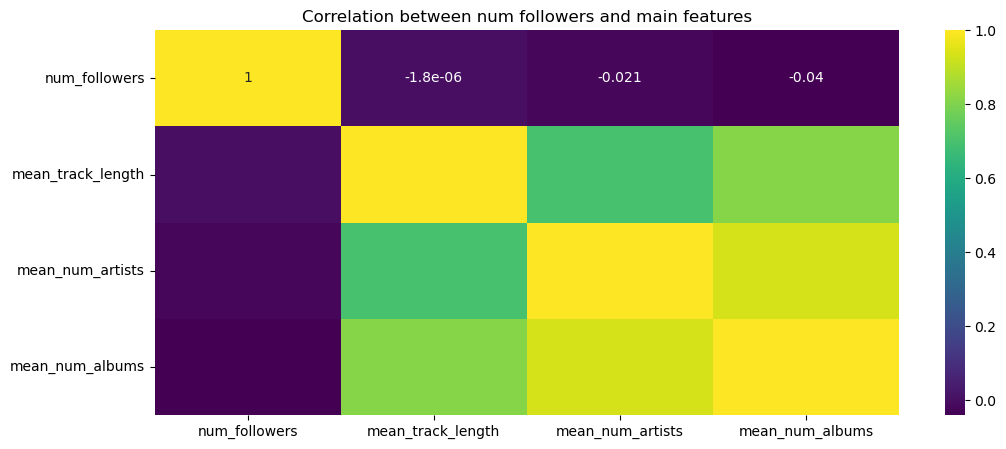

In [65]:
main_correlated_columns = mean_main_df.drop(['quartile_group'],axis=1)
plt.figure(figsize=(12,5))
plt.title("Correlation between num followers and main features")
sns.heatmap(main_correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

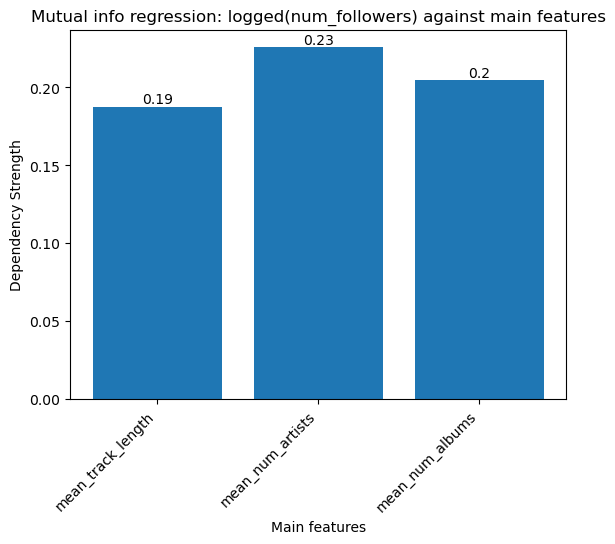

In [66]:
# with logged num_followers
main_features = ['mean_track_length', 'mean_num_artists',
       'mean_num_albums']
values = mutual_info_regression(mean_main_df[main_features],mean_main_df['num_followers'])
plt.bar(main_features,values,width=0.8)
plt.xticks(rotation=45,ha='right')
plt.title("Mutual info regression: logged(num_followers) against main features")
plt.ylabel("Dependency Strength")
plt.xlabel("Main features")
for i, v in enumerate(values):
    plt.text(i, v, str(round(v,2)), ha='center', va='bottom')
plt.show()